### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# Read the data
df = pd.read_csv('foodhub_order.csv')
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Check the shape of the dataset
df.shape

(1898, 9)

- There are 1898 rows and 9 columns in the dataset.

### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [4]:
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

- Of the 9 columns, 4 are integer data types, 4 are object data types, and 1 is a float data type.
- 4 of the columns are categorical while 5 are numerical.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [5]:
# Checking for missing values in the data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

- There are no missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# Get the summary statistics of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


- The minimum time it takes for food to be prepared after order is confirmed is 20 mins while the maximum time is 35 mins. The average time it takes for food to be prepared after order is confirmed is approximately 27 mins.
- The minimum time it takes for food to be delivered is 15 mins while the maximum time is 33 mins. The average delivery time is 24 mins.
- The lowest amount spent on an order is 4.47 dollars while the highest amount spent on an order is 35.41 dollars. The average order cost approximately 16.5 dollars.

### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

- Of the 1,898 orders, 736 were not rated representing 38.7% of the total orders.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [8]:
# check unique order ID
df['order_id'].nunique()

1898

- Every order is unique and there are 1,898 of them indicating that there are no duplicates.

#### Customer ID

In [10]:
# check unique customer ID
df['customer_id'].nunique()

1200

- There are 1200 unique customer ids in the data.

#### Restaurant name

In [11]:
# check unique Restaurant Name
df['restaurant_name'].nunique()

178

- There are 178 unique restaurant names in the data.

#### Cuisine type

In [13]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14

- There are 14 different cuisine types in the data

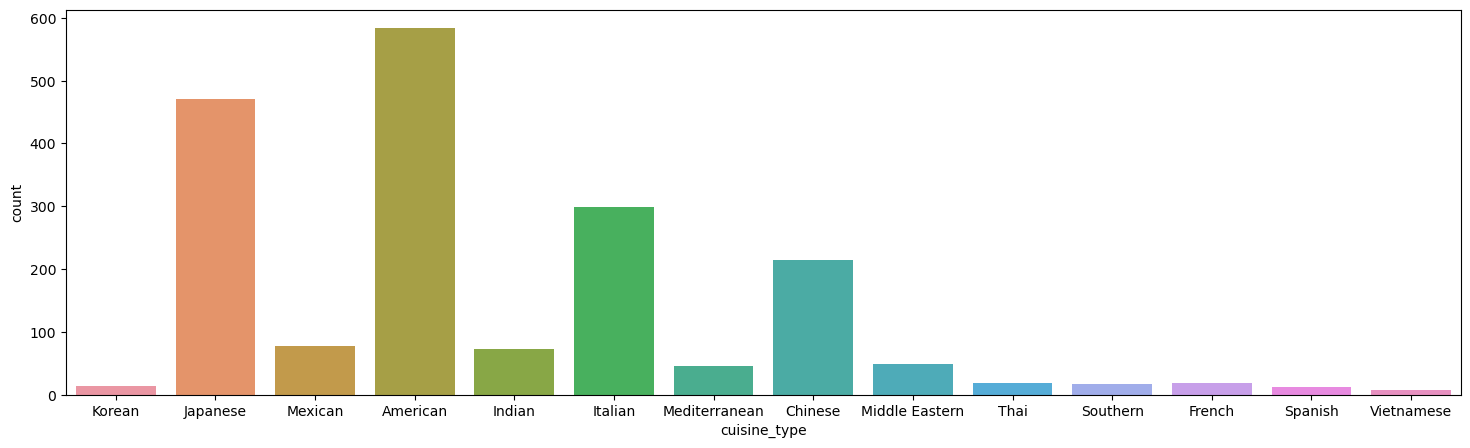

In [21]:
plt.figure(figsize = (18,5))
sns.countplot(data = df, x = 'cuisine_type'); ## Create a countplot for cuisine type.

- American cuisine is the most ordered, followed by Japanese and Italian.
- The least ordered cuisine type is Vietnamese.

#### Cost of the order

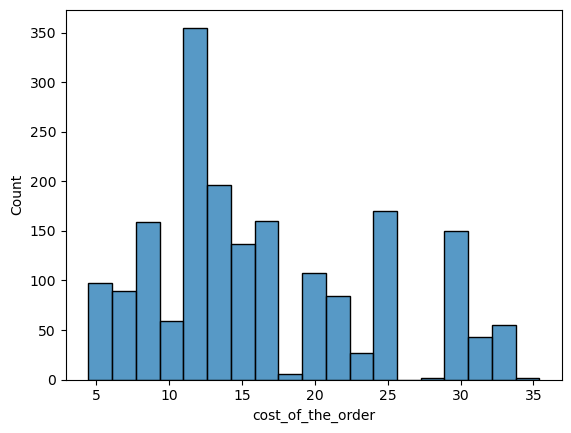

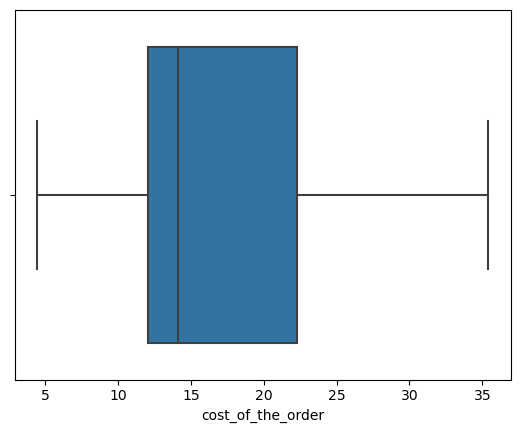

In [22]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

- Cost of orders range from 'cheap' (4.47 dollars) to 'expensive' (35.41 dollars).
- The distribution is slightly skewed to the right because the mean (16.5 dollars) is higher than the median (14.14 dollars). 
- This right skewed distribution is explained by some high cost of orders between 22.3 dollars and 35.41 dollars, driving the average cost of order up.
- Half of all orders fall between 12.08 dollars (25th percentile) and 22.3 dollars (75th percentile).
- In summary, the distribution show that most orders are moderately priced but there is a tail of higher-priced orders which influence the overall average cost of order.

#### Day of the week

In [24]:
# # Check the unique values
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

- The unique values for the day of the week are Weekday and Weekend.

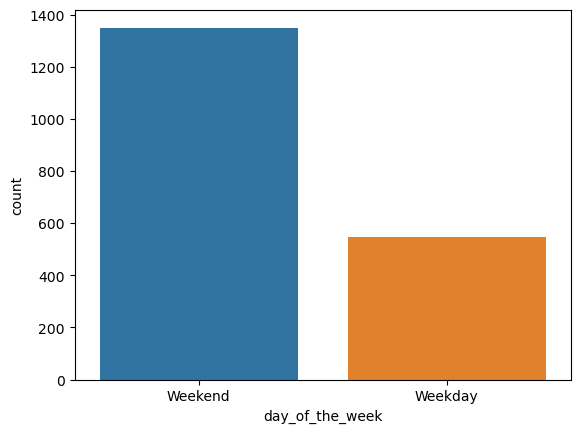

In [25]:
sns.countplot(data = df, x = 'day_of_the_week');

- There are more orders on Weekends(>1300) than Weekdays (<600).

#### Rating

In [26]:
# Check the unique values
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

- The uique ratings are 5, 4, 3, and Not given.

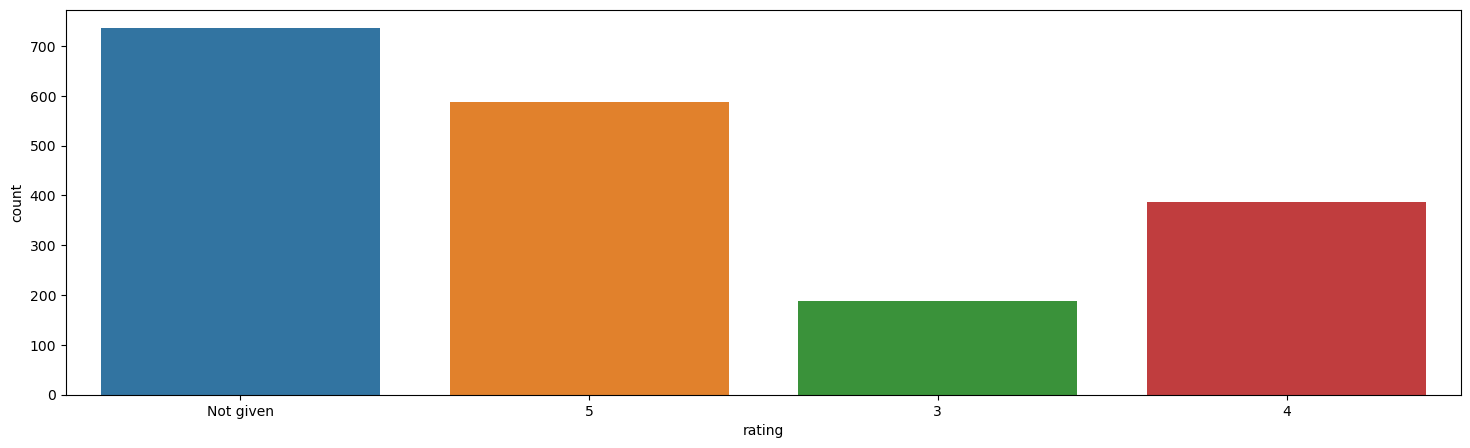

In [33]:
# countplot showing the distribution of ratings
plt.figure(figsize = (18,5))
sns.countplot(data = df, x = 'rating');

- More than 700 ratings were 'Not given', representing the highest category.
- ~600 customers gave a 5 star rating, while ~400 gave a 4 start rating.
- The lowest rating of 3 was given by ~300 customers.

#### Food Preparation time

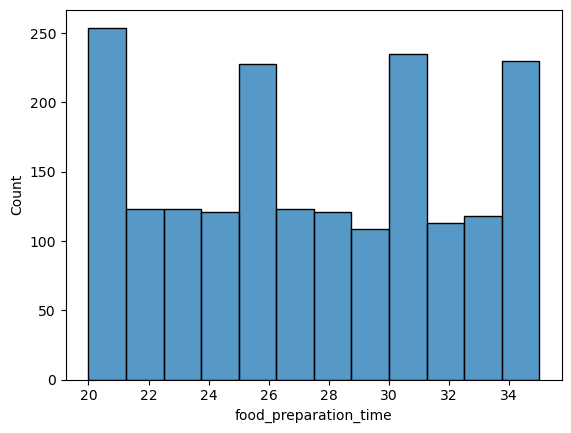

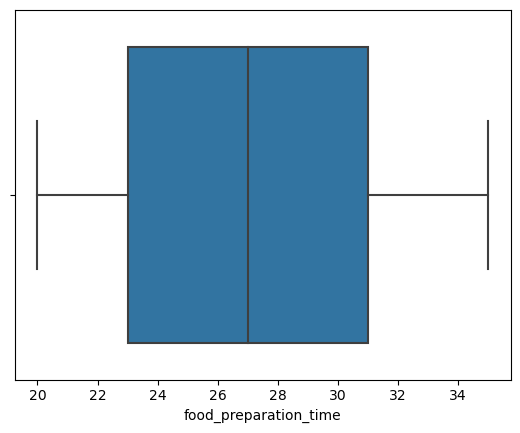

In [41]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

- The minimum time it takes to prepare food is 20 minutes while the maximum is 35 minutes.
- The average time it takes to prepare food is 27.3 minutes while 50% or less of the preparation time is 27 minutes. Hence, the distribution is fairly symmetrical because the mean and median are very close.
- Half of all preparation times fall between 23 minutes (25th percentile) and 31 minutes (75th percentile), meaning half of all preparation times fall within an 8-minute range.

#### Delivery time

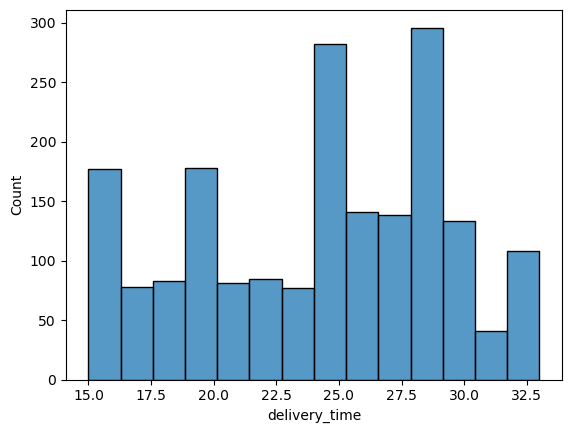

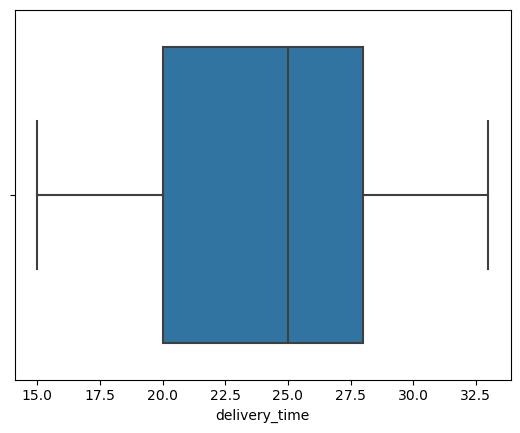

In [55]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

- The minimum delivery time is 15 minutes while the maximum is 33 minutes. Hence, all delivery times have an 18-minute range.
- The mean delivery time is 24.16 minutes while the median is 25 minutes. The mean is slightly lower than the median which implies a slight left skewed distribution.
- Again, half of the delivery occur within an 8-minute time frame.
- In summary, the delivey times are relatively consistent, hovering around 24-25 minutes. The slight left skew might indicate that while there us a typical delivery time, there are occasional faster deliveries that influence the overall average. The distribution suggests a predictable, efficient delivery system which is important for customer satisfaction in a food delivery service.

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [58]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

- The top 5 restaurants in terms of number of orders are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [60]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].unique()

array(['Korean', 'Japanese', 'American', 'Italian', 'Mexican',
       'Mediterranean', 'Chinese', 'Indian', 'Thai', 'Southern', 'French',
       'Spanish', 'Middle Eastern', 'Vietnamese'], dtype=object)

- There are 14 popular cuisine types ordered by customers on weekends. 
- The cuisines are 'Korean', 'Japanese', 'American', 'Italian', 'Mexican', 'Mediterranean', 'Chinese', 'Indian', 'Thai', 'Southern', 'French', 'Spanish', 'Middle Eastern', and 'Vietnamese'.

### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]


In [61]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order'] > 20]

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### **Question 10:** What is the mean order delivery time? [1 mark]

In [62]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [63]:
# Get the counts of each customer_id
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

- Customers with ids 52832, 47440, and 83287 are the top 3 frequent customers. They made 13, 10, and 9 orders respectively.

### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

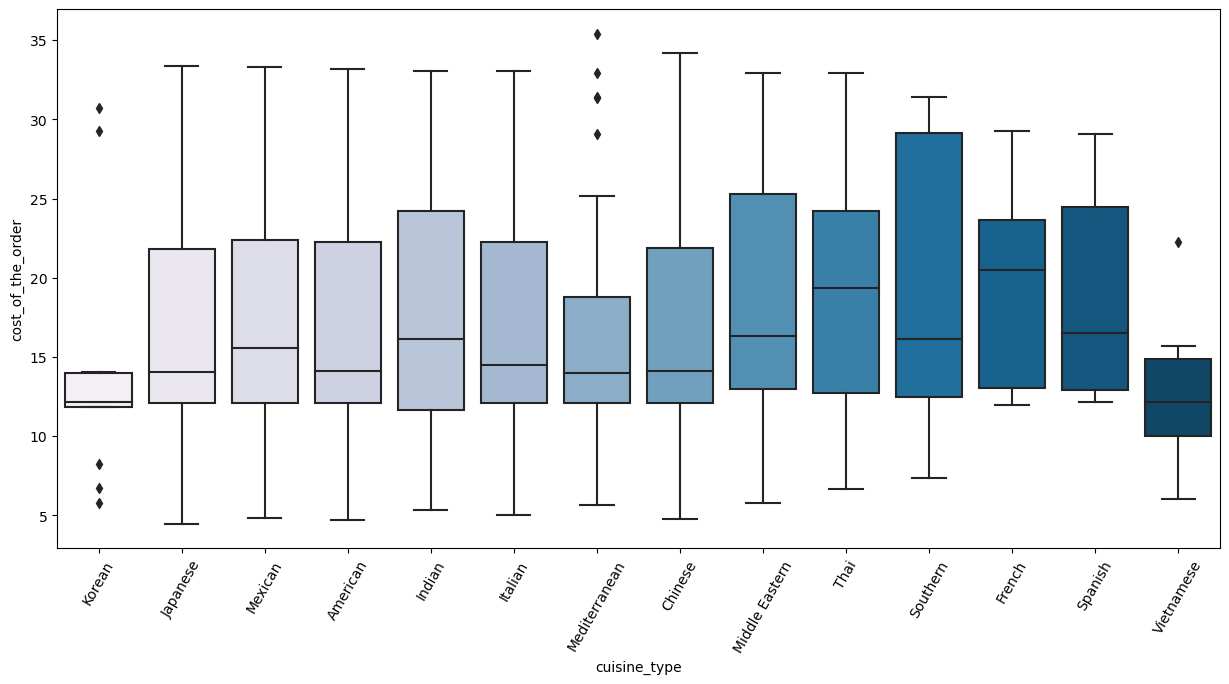

In [64]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

- With the exception of a few orders between 5 and 10 dollars, majority of customers who ordered Korean cuisine spent approximately between 12 and 14 dollars.
- 25% of customers who ordered Southern spent at least ~12 dollars on an order, with 75% spending at least about 28 dollars on each order. This cuisine is the one where the company made the most money from, in terms of how much was spent on orders.

#### Cuisine vs Food Preparation time

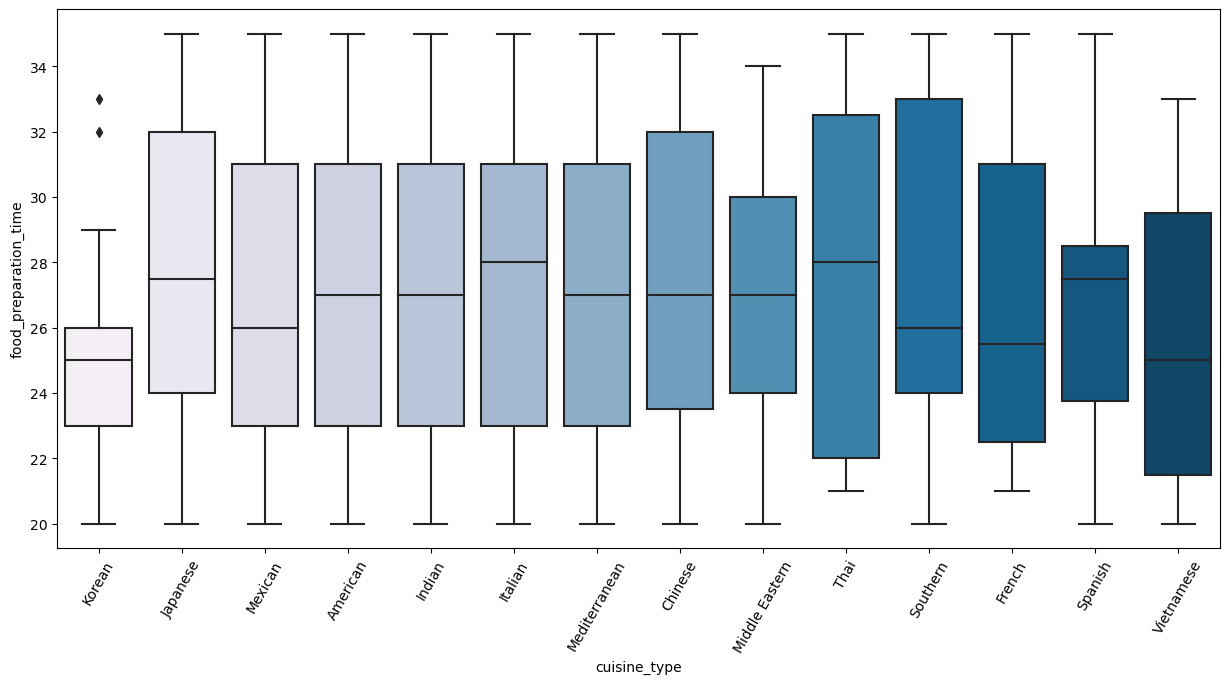

In [65]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = 'cuisine_type', y = 'food_preparation_time', data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

- The cuisine that takes the least time to prepare is Korean, with 75% not taking more than 26 minutes to prepare.
- Thai cuisine takes the longest to prapare, with 50% of the cuisine taking about 28 minutes to prepare and 75% taking about 32 minutes or less to prepare.

#### Day of the Week vs Delivery time

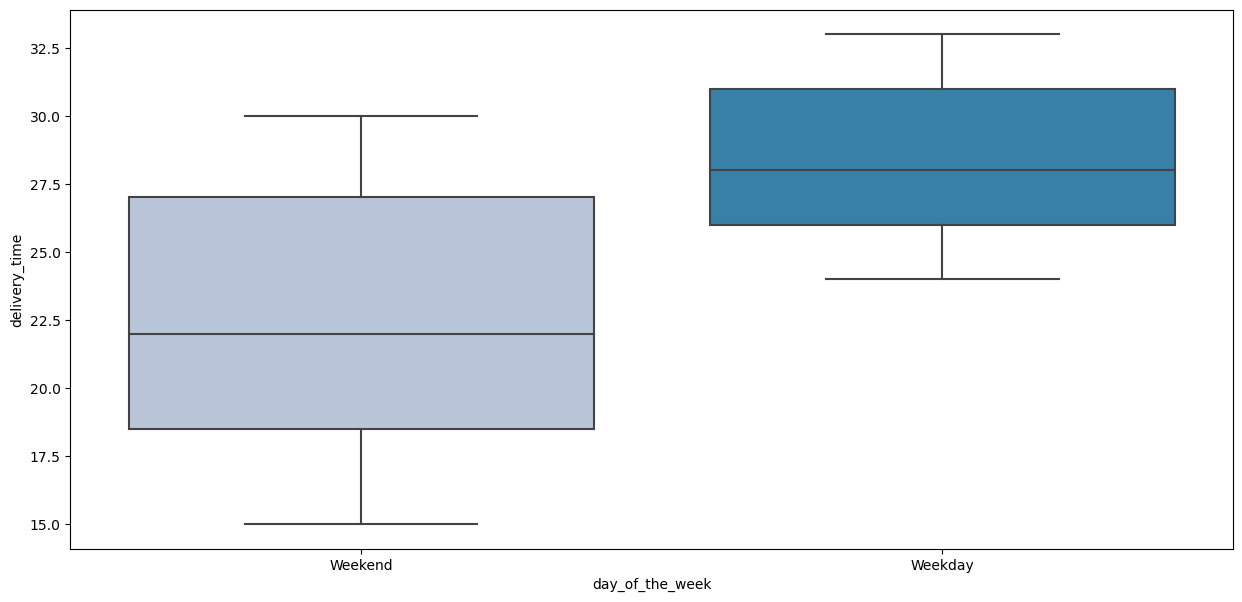

In [66]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = df, palette = 'PuBu')
plt.show()

- The minimum time it takes an order to be delivered during the weekend is 15 minutes while it is above 23 minutes on weekdays.
- The maximum delivery time is also lower on weekends (~30 minutes) compared to wekdays (>33 minutes).
- 75% of orders on weekends take ~27 minutes or less, while 75% of orders on weekdays take above 30 mins or less.

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [67]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

- The top 3 restaurants by revenue are:
    - Shake Shack : 3,579.53 dollars
    - The Meatball Shop : 2,145.21 dollars
    - Blue Ribbon Sushi : 1,903.95 dollars
    
- The bottom 3 restaurants by revenue are:
    - Five Guys Burgers and Fries : 506.47 dollars
    - Nobu Next Door : 623.67 dollars
    - Sushi of Gari 46 : 640.87 dollars

#### Rating vs Delivery time

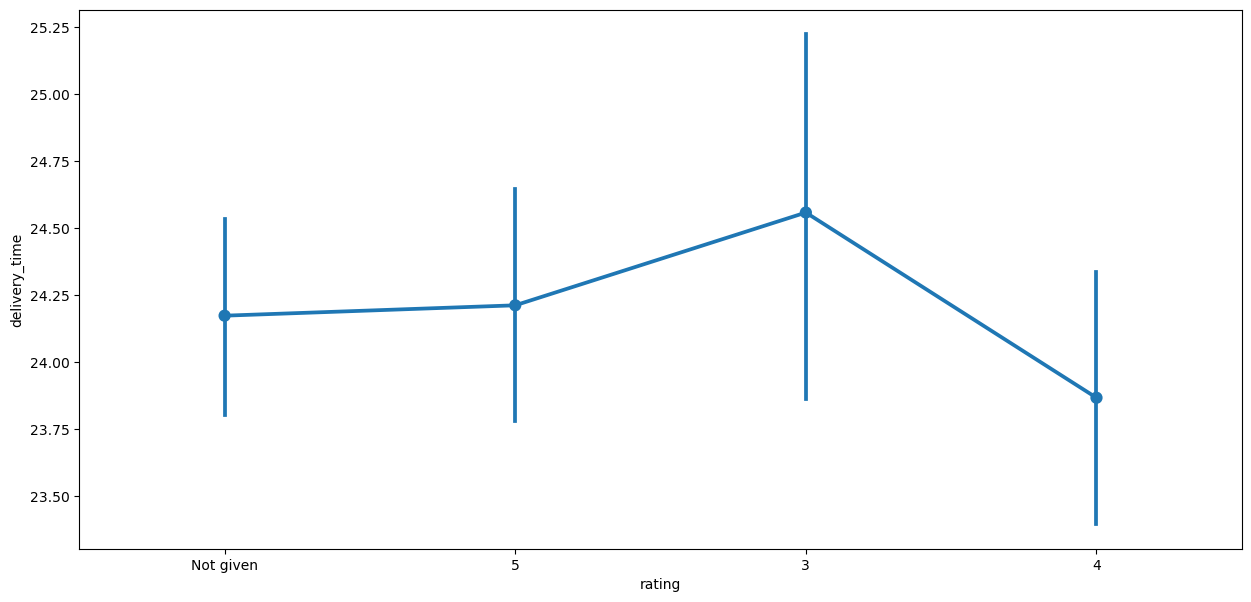

In [68]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

- Restaurants with a 4 star rating have the lowest average delivery time while restaurants with a 3 star rating have the highest average delivery time.
- Interesting to note that restaurants with 5 star ratings do not have the fastest delivery times. 5-start restaurants are slightly slower than 4-start restaurants but faster than those with 3 stars.
- No clear relationship between the rating and delivery time. It is possible that there are other factors other than delivery times that influence the rating given by customers.

#### Rating vs Food preparation time

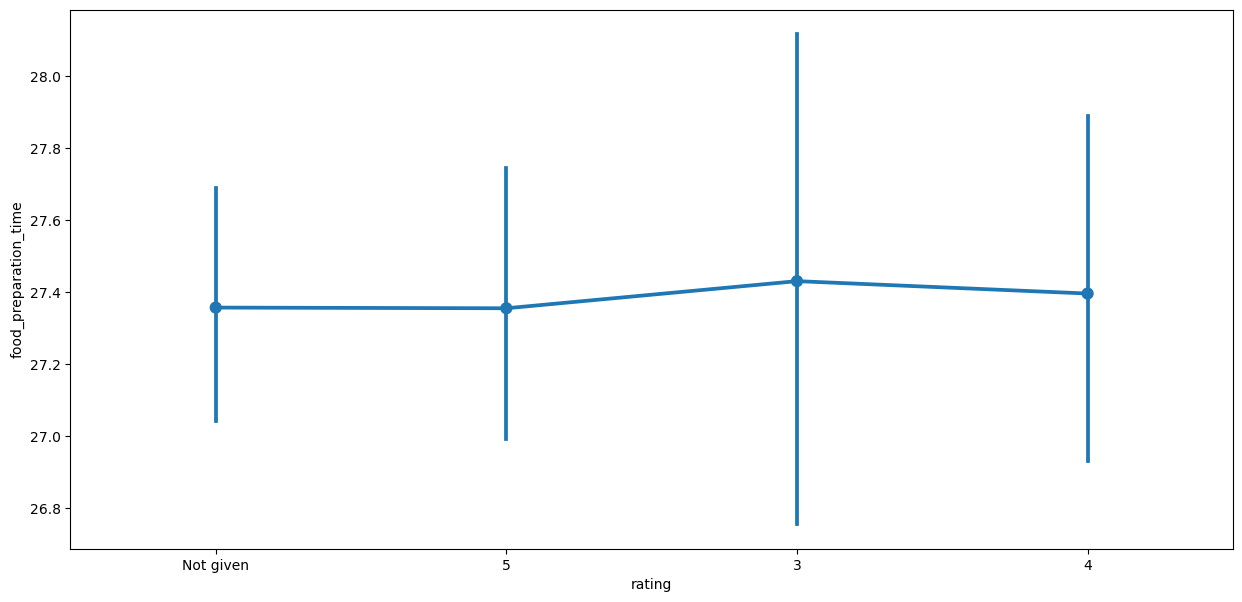

In [69]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

- Again, there is no clear relationshop between the time it takes to prepare the food and the rating.
- Interesting to note the 5-star ratings and those that were not given have similar average preparation times at slightly less than 27.4 minutes.

#### Rating vs Cost of the order

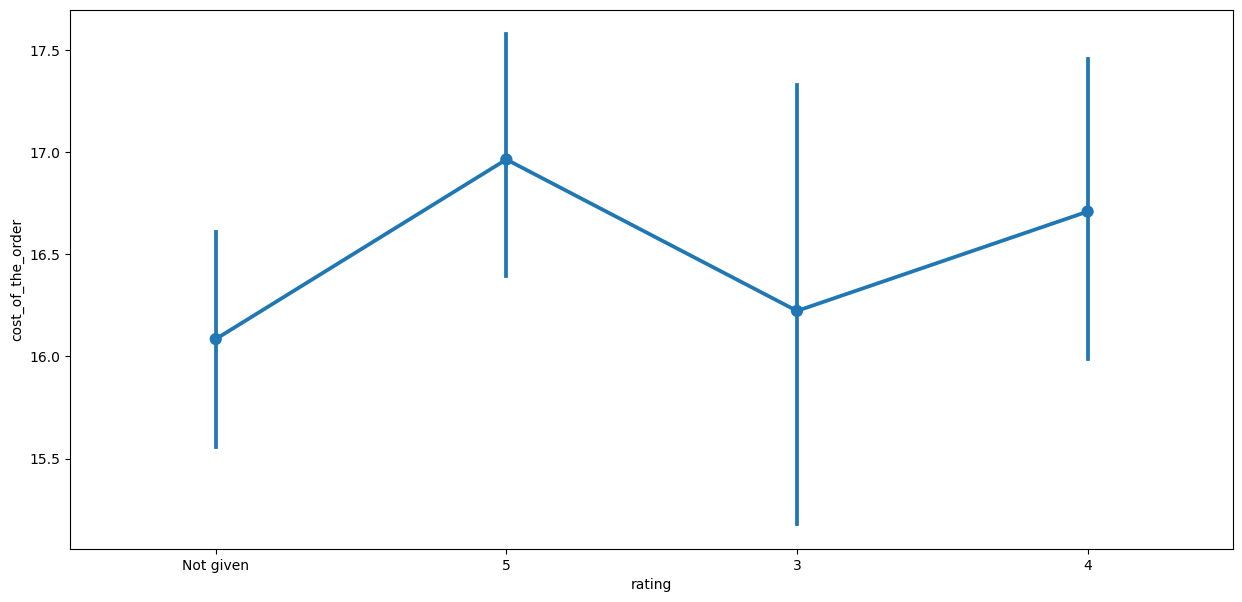

In [70]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

- Orders with the highest average cost have the best rating (5-star) while orders with the lowest average order cost were not given.
- The overall range in average order cost is less than a dollar, indicating that the order cost does not strongly influence rating.
- It is possible that orders rated 5-star are a result of superior quality ingredients, more elaborate dishes, or a premium packaging (just to mention a few) but more analysis will be needed to determine this.

#### Correlation among variables

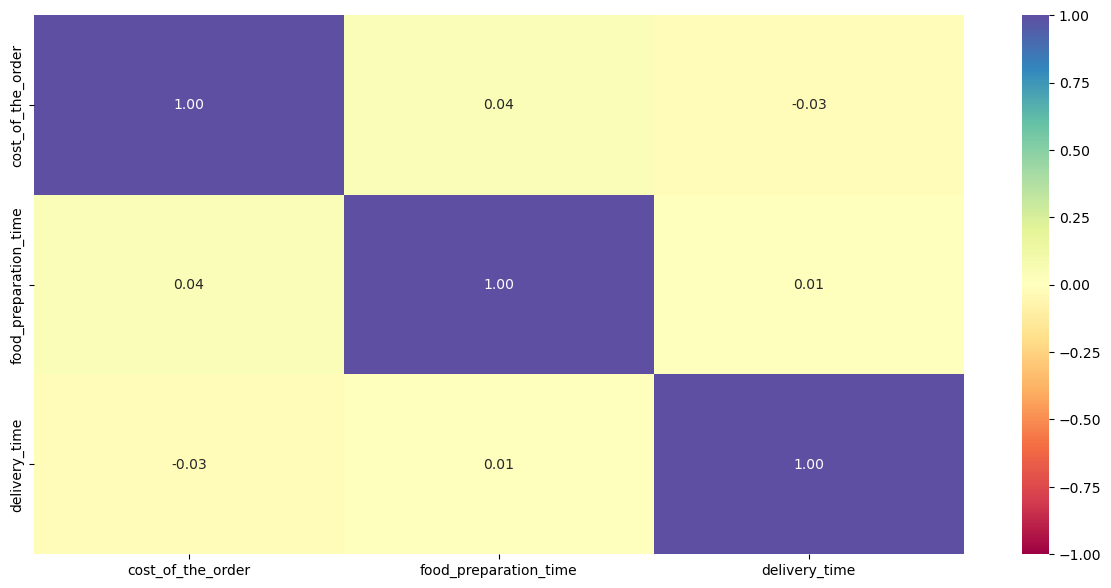

In [71]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- There is no correlation between any pair of numerical variables in this data.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [72]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [73]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
result = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna()

In [75]:
result

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [76]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [77]:
# get the total revenue and print it
total_rev = df['Revenue'].sum()
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]


In [78]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Get orders whose delivery time is more than 60 minutes
df_total_time_greater_than_60 = df[df['total_time'] > 60]

# Calculate the number of orders whose delivery time is more than 60 minutes
print('The number of orders whose delivery time is more than 60 minutes:', df_total_time_greater_than_60.shape[0])

# Calculate percentage of such orders in the dataset
percent = (df_total_time_greater_than_60.shape[0] / df.shape[0]) * 100

print("Percentage of orders whose delivery time is greater than 60 minutes:", round(percent, 2), '%')

The number of orders whose delivery time is more than 60 minutes: 200
Percentage of orders whose delivery time is greater than 60 minutes: 10.54 %


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [79]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

# Get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

* Popular Cuisines and Restaurants: American, Japanese, and Italian cuisines are the most popular. Top restaurants include Shake Shack and The Meatball Shop.

* Revenue and High-Value Orders: 29.24% of orders are above $20, contributing significantly to revenue.

* Delivery Efficiency: 10.54% of orders have delivery times over an hour.

* Customer Ratings: A significant portion (38.7%) of orders are not rated. Among rated orders, 5-star and 4-star ratings are the most common.

* Preparation and Delivery Times: Food preparation (avg. 27 mins) and delivery times (avg. 24 mins) are consistent. Weekend deliveries are faster than weekdays.

* Weekend Cuisine Variety: 14 popular cuisine types are ordered on weekends.

* Cuisine-Specific Strategies: Korean cuisine orders are consistently priced, while Southern cuisine has higher-value orders.

* Preparation Time Optimization: Korean cuisine has the shortest preparation time, while Thai cuisine takes longest.

* Rating and Delivery Time Correlation: 4-star rated restaurants have the lowest average delivery times, not 5-star ones.

* Order Cost and Ratings: Highest average cost orders have the best ratings, but the range is small.

### Recommendations:

* Popular Cuisines and Restaurants: Expand partnerships with popular cuisine types. Feature top-performing restaurants more prominently in the app.

* Revenue and High-Value Orders: Implement a loyalty program targeting high-value customers. Offer incentives for orders above $20 to increase average order value.

* Delivery Efficiency: Investigate and address factors causing long delivery times. Consider capping delivery radius or increasing delivery staff during peak times.

* Customer Ratings: Implement a post-order rating prompt on the app to increase feedback rates. Analyze highly rated orders to identify best practices.

* Preparation and Delivery Times: Optimize weekday delivery processes to match weekend efficiency. Consider a guarantee for delivery within 30 minutes to boost customer confidence.

* Weekend Cuisine Variety: Create weekend-specific promotions featuring a "cuisine of the week" to maintain variety and drive sales of different cuisines.

*  Cuisine-Specific Strategies: Promote Korean cuisine for its value consistency. Market Southern cuisine as a premium option for special occasions.

* Preparation Time Optimization: Analyze Korean cuisine preparation methods to potentially apply efficiencies to other cuisines. Work with Thai restaurants to streamline their processes.

* Rating and Delivery Time Correlation: Focus on optimizing delivery times for 5-star restaurants to potentially boost them to consistent 5-star ratings. Investigate other factors contributing to 5-star ratings beyond delivery speed.

* Order Cost and Ratings: Investigate what factors beyond cost contribute to higher ratings (e.g., quality, packaging, etc). Implement these factors across all price points to improve overall satisfaction.

---